## Ans 2 a)

In [101]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([[1, 2], [2, 4], [3, 6], [4, 8]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.array([2,3,4,5])
reg = LinearRegression().fit(X, y)

print("score = ",reg.score(X, y))#1.0
print("coeffients = ",reg.coef_)
print("intercept = ",reg.intercept_) 


score =  1.0
coeffients =  [0.2 0.4]
intercept =  0.9999999999999996


## Ans 2 b)

In [102]:
X = np.array([[1, 2], [2, 4], [3, 6], [4, 8]])
x_transpose = X.transpose()
y = np.array([2,3,4,5])
X =np.matmul(X, x_transpose)
np.linalg.inv(X)

LinAlgError: Singular matrix

 The matrix above is non- invertible because it is a singular matrix or we can say that one or more row of a matrix is not independent i.e not a full rank matrix and hece no extra information is provided with it.


scikit-learn implementation still correctly solve this regression problem because, if the matrix is not invertible then it uses sudo inverse of that matrix for the purpose of calculation.

## Ans 3 a)

In [247]:
# calculation of the accuracy Mean Squared 
import math

def accuracy_cal(actual, predicted):
    mse = 0.0  # number of predication that has been done true
   # print(predicted)
    #print(type(actual))
    #print(actual)
    act = list(map(int, actual))
    predit = list(map(int, predicted))
    #print("------------")
    #print(predicted[0])
    for i in range(len(actual)):
         mse = mse + ((act[i] - predit[i])**2)   
    return math.sqrt(mse/len(actual))

In [248]:
import pandas as pd
import sklearn
file = pd.read_csv("Real_estate_valuation_data_set.csv")
file.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [249]:
from sklearn.linear_model import LinearRegression

X = file[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
               'X4 number of convenience stores', 'X5 latitude',"X6 longitude"]]
y = file['Y house price of unit area']

# test-train split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.4, random_state=101)

# learning
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [250]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# pridict on test data
predictions = lm.predict(X_test)

# cal root mean square error
rms = sqrt(mean_squared_error(y_test,predictions))
print("root mean squred error on test dat = ",rms)
accurcy = accuracy_cal(predictions,y_test)

root mean squred error on test dat =  7.225715568817695


## Ans 3 b)

In [251]:
print("coeffients = ",lm.coef_)

coeffients =  [ 5.06414221e+00 -2.83627390e-01 -4.81454698e-03  1.00267145e+00
  2.30625349e+02 -2.54512413e+01]


In Linear regression,the size of the coefficent for each variable, gives the size of the effect that variable is having on your dependent variable and The sign of the co-efficient gives you the direction of the effect with a single independent variable.
In regression with multiple independent variables, the coefficient tells how much the dependent variable is changed,holding other independent variables constant.

Consequently, it is easy to think that variables with larger coefficients are more important because they represent a larger change in the response. However, the unitsvary between the different types of variables, which makes it imposibble to compare them directly.

## Ans 3 c)

In [252]:
from sklearn.preprocessing import scale
X = scale( X, axis=0, with_mean=True, with_std=True, copy=True )
print(X)

[[-0.82368321  1.25562833 -0.79249504  2.00740743  1.12542986  0.44876222]
 [-0.82368321  0.15708622 -0.61661163  1.66750286  0.91244418  0.40113894]
 [ 1.54115111 -0.38779067 -0.41401527  0.30788458  1.48686011  0.68818339]
 ...
 [ 0.35873395  0.09556786 -0.54967846  0.98769372  0.82289338  0.42397202]
 [-0.52896662 -0.84478419 -0.77668389  0.30788458 -0.18475479  0.4768143 ]
 [ 1.24643452 -0.98539758 -0.78807071  1.66750286  0.42757905  0.63534112]]


In [253]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
print(scaler.fit(X))
X =  scaler.transform(X)
print(X)
#scaler = MinMaxScaler()
#print(scaler.fit(y))
#y = scaler.transform(y)
#scaler.transform(Y)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.4, random_state=101)

MinMaxScaler(copy=True, feature_range=(0, 1))
[[0.27292576 0.73059361 0.00951267 1.         0.61694135 0.71932284]
 [0.27292576 0.44520548 0.04380939 0.9        0.5849491  0.71145137]
 [1.         0.30365297 0.08331505 0.5        0.67123122 0.75889584]
 ...
 [0.63646288 0.42922374 0.05686115 0.7        0.57149782 0.71522536]
 [0.36353712 0.18493151 0.0125958  0.5        0.42014057 0.72395946]
 [0.90938865 0.14840183 0.0103754  0.9        0.51211827 0.75016174]]


In [254]:
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)
rms = sqrt(mean_squared_error(y_test,predictions))
print("root mean squred error on test dat = ",rms)

root mean squred error on test dat =  7.22571556881748


In [255]:
print("coeffients = ",lm.coef_)

coeffients =  [  4.63875426 -12.42287968 -31.1243041   10.02671449  19.03120383
  -2.36034812]


After standerdizing the features, they are on the same scale and hence allows you to compare their co-officients directly. Standardized coefficients represent the mean change in the response given a one standard change in the predictor. So, we can say that the feature with greatest coefficients is more important or the value of the dependent variable is influenced more by feature having larger coefficients.

## Ans 3 d) Residual

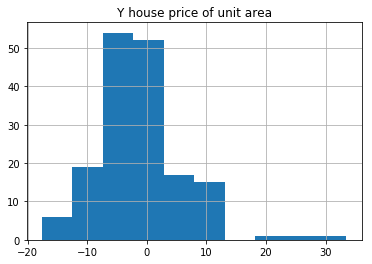

In [256]:
import matplotlib.pyplot as plt
import numpy as np
residuals = y_test - predictions
residuals = pd.DataFrame(residuals)
residuals.hist()
#residuals.plot.density()
plt.show()

## Ans 3 e)

In [257]:
# calculation of the accuracy Mean Squared 
def accuracy_cal(actual, predicted):
    mse = 0.0  # number of predication that has been done true
   # print(predicted)
    #print(type(actual))
    #print(actual)
    act = list(map(int, actual))
    predit = list(map(int, predicted))
    #print("------------")
    #print(predicted[0])
    for i in range(len(actual)):
         mse = mse + ((act[i] - predit[i])**2)   
    return mse/len(actual)

In [258]:
from sklearn.model_selection import KFold # import KFold

def split_K_FOLD(features):
    kf = KFold(n_splits=5) # Define the split - into 5 folds 
    kf.get_n_splits(features) # returns the number of splitting iterations in the cross-validator
    #print(kf) 
    #KFold(n_splits=5, random_state=None, shuffle=False)
    return kf.split(features) 

'''
for train_index, test_index in kf.split(X):
    #print('TRAIN ;', train_index, '“TEST:”', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
'''
    
def kFold(dataset,y, n_folds):
    fold = len(dataset)/n_folds
     #split the data in k folds
    data = dataset
    n_f = n_folds
    score = .05
    dataset_split = list()  #list to store all the k folds 
    dataset_copy = list(data) 
    fold_size = int(len(data) / n_f)  #size of each fold
    for i in range(0,n_f-1):
        fold = list()
        while len(fold) < fold_size:
            #index = randrange(0,len(dataset))
            #fold.append(dataset.pop(index))
        #dataset_split.append(fold)
            dataset_split = []
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(dataset, y, test_size=0.4, random_state=101)    
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    predictions = lm.predict(X_test)
    #print("prediction done")
    #predicted = algorithm(train_set, test_set, *args)
    actual = y_test
    score = accuracy_cal(predictions,y_test)
    return score*100



In [278]:
from random import randrange
from itertools import permutations 
from itertools import combinations
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
  
def get_best_features(no_of_features_to_take):
    comb = combinations(['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
               'X4 number of convenience stores', 'X5 latitude',"X6 longitude"], no_of_features_to_take) 
    acc_old = 1000
    acc_new = 0
    f = []
    #print("here======================")
    # Print the obtained permutations 
    for i in list(comb): 
        
        #print ("[[[[[[[[[[[[[[[",i)
        file = pd.read_csv("Real_estate_valuation_data_set.csv")
        features = file[list(i)]
        y = file['Y house price of unit area']
        skf = StratifiedKFold(n_splits=2)
        skf.get_n_splits(features)
        skf = KFold(n_splits=4, random_state=None, shuffle=False)
        
        for train_index, test_index in skf.split(features):
            #print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_test = features[train_index], features[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            lm = LinearRegression()
            lm.fit(X_train,y_train)
            predictions = lm.predict(X_test)
            #print("prediction done")
            #predicted = algorithm(train_set, test_set, *args)
            actual = y_test
            score = lm.score(X_test,y_test)
            acc_new = score*100
            rms = sqrt(mean_squared_error(y_test,predictions))
            #acc_new = accuracy_cal(y_test,predictions)
            #print("new ====",acc_new,"old===========",acc_old)
            if acc_old > rms :
                acc_old = rms
                f = list(i)
                print("here========")
        
        #acc_new = kFold(features,y, 5)
        
    return (acc_old,f)
    
    
    

In [277]:

print("accuracy when all features are used = ",accurcy,"%")
for i in range(1,5):
    print('--------------')
    print("n = ",i)
    feature = get_best_features(i)
    print("accuracy =", feature[0],"%")
    print("best accuracy when selected feature = ",feature[1])

accuracy when all features are used =  7.276385306766686 %
--------------
n =  1


TypeError: 'KFold' object is not iterable

In [279]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out = 0.05, verbose=True):
    included = list(initial_list)
    print(included)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} '.format(best_feature))
    return included

result = stepwise_selection(X, y)
print('resulting features:')
print(result)

[]


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

## Ans 4

In [262]:
def normalEquationRegression(X, y):
    X = np.concatenate((np.ones((X.shape[0],1)),X),axis=1)
    #print(X)
    return np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)

def gradientDescentRegression(x,y,alpha=0.1):
    costs = []
    thetas = []
    x = np.concatenate((np.ones((x.shape[0],1)),x),axis=1)
    theta = np.random.rand(x.shape[1])
    theta = np.array(theta)
    init_theta = theta
    iterations = 2000
    m = y.size
    e1 = 0
    e2 = 0
    flag = 0
    #print('theta : ',theta)
    for i in range(iterations):
        prediction = np.dot(x, theta)#.reshape(x.shape[0],1)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        
        e1 = e2
        e2 = cost
        #print('pred : ',prediction.shape)
        #print('y : ',y.shape)
        if (e2 - e1) > 0 and flag ==0:
            #theta = init_theta
            alpha = alpha - alpha * 0.5
        #elif flag==0:
        #    theta = init_theta
        #    flag=1
        elif flag==0:
            theta = init_theta
            flag=1
        #alpha += 0.5*alpha
        #costs.append(theta)
        #print(alpha,cost)
        thetas.append(theta)
    return thetas,costs




data = pd.read_csv(r'Real_estate_valuation_data_set.csv')
print(data.head(5))

   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

In [263]:
X = data.iloc[:,1:7]
Y = data.iloc[:,-1]
print(X.head())
print(Y.head())

   X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
0             2012.917          32.0                                84.87882   
1             2012.917          19.5                               306.59470   
2             2013.583          13.3                               561.98450   
3             2013.500          13.3                               561.98450   
4             2012.833           5.0                               390.56840   

   X4 number of convenience stores  X5 latitude  X6 longitude  
0                               10     24.98298     121.54024  
1                                9     24.98034     121.53951  
2                                5     24.98746     121.54391  
3                                5     24.98746     121.54391  
4                                5     24.97937     121.54245  
0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64


In [264]:
print(normalEquationRegression(X,Y)[1])
#print(np.ones(X.shape[0]).T.shape)

3.74015108341895


## Ans 5

In [265]:
x = np.arange(0, 20.1, 0.1)
np.random.seed(0)
y = 1*x**5 + 3*x**4 - 100*x**3 + 8*x**2 -300*x - 1e5 + np.random.randn(len(x))*1e5
#print(x,y)

In [266]:
X5 = x.reshape(x.shape[0],1)
for i in range(2,6):
    X5 = np.concatenate((X5,x.reshape(x.shape[0],1)**i),axis=1)
    #print(X5.shape)

In [267]:
X4 = X5[:,:4]
print(normalEquationRegression(X4,y))


[ 5.29201681e+04 -1.26089185e+05  2.78067072e+04 -2.48850506e+03
  8.78523715e+01]


## Ans 6 a)

Text(0,0.5,'theta1')

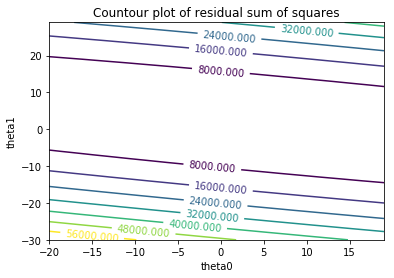

In [268]:
x = np.arange(-20.0, 20.0, 1)
y = np.arange(-30.0, 30.0, 1)
X, Y = np.meshgrid(x, y)
Z = 3*(X**2) + 46 *(Y**2) + 20*X*Y - 64*X - 246*Y + 392

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Countour plot of residual sum of squares')
ax.set_xlabel("theta0")
ax.set_ylabel("theta1")

## Ans 6 b)

In [269]:
data = np.array([[1,3,6],[6,10,16]]).T
#print(data)
X_6b = data[:,:1]
Y_6b = data[:,1:2]
Y_6b = np.array([6,10,16])
print(X_6b,Y_6b.shape)

[[1]
 [3]
 [6]] (3,)


In [270]:
thetas,cost = gradientDescentRegression(X_6b,Y_6b)
print(thetas[-1])

[4. 2.]


In [271]:
print(type(thetas))



<class 'list'>


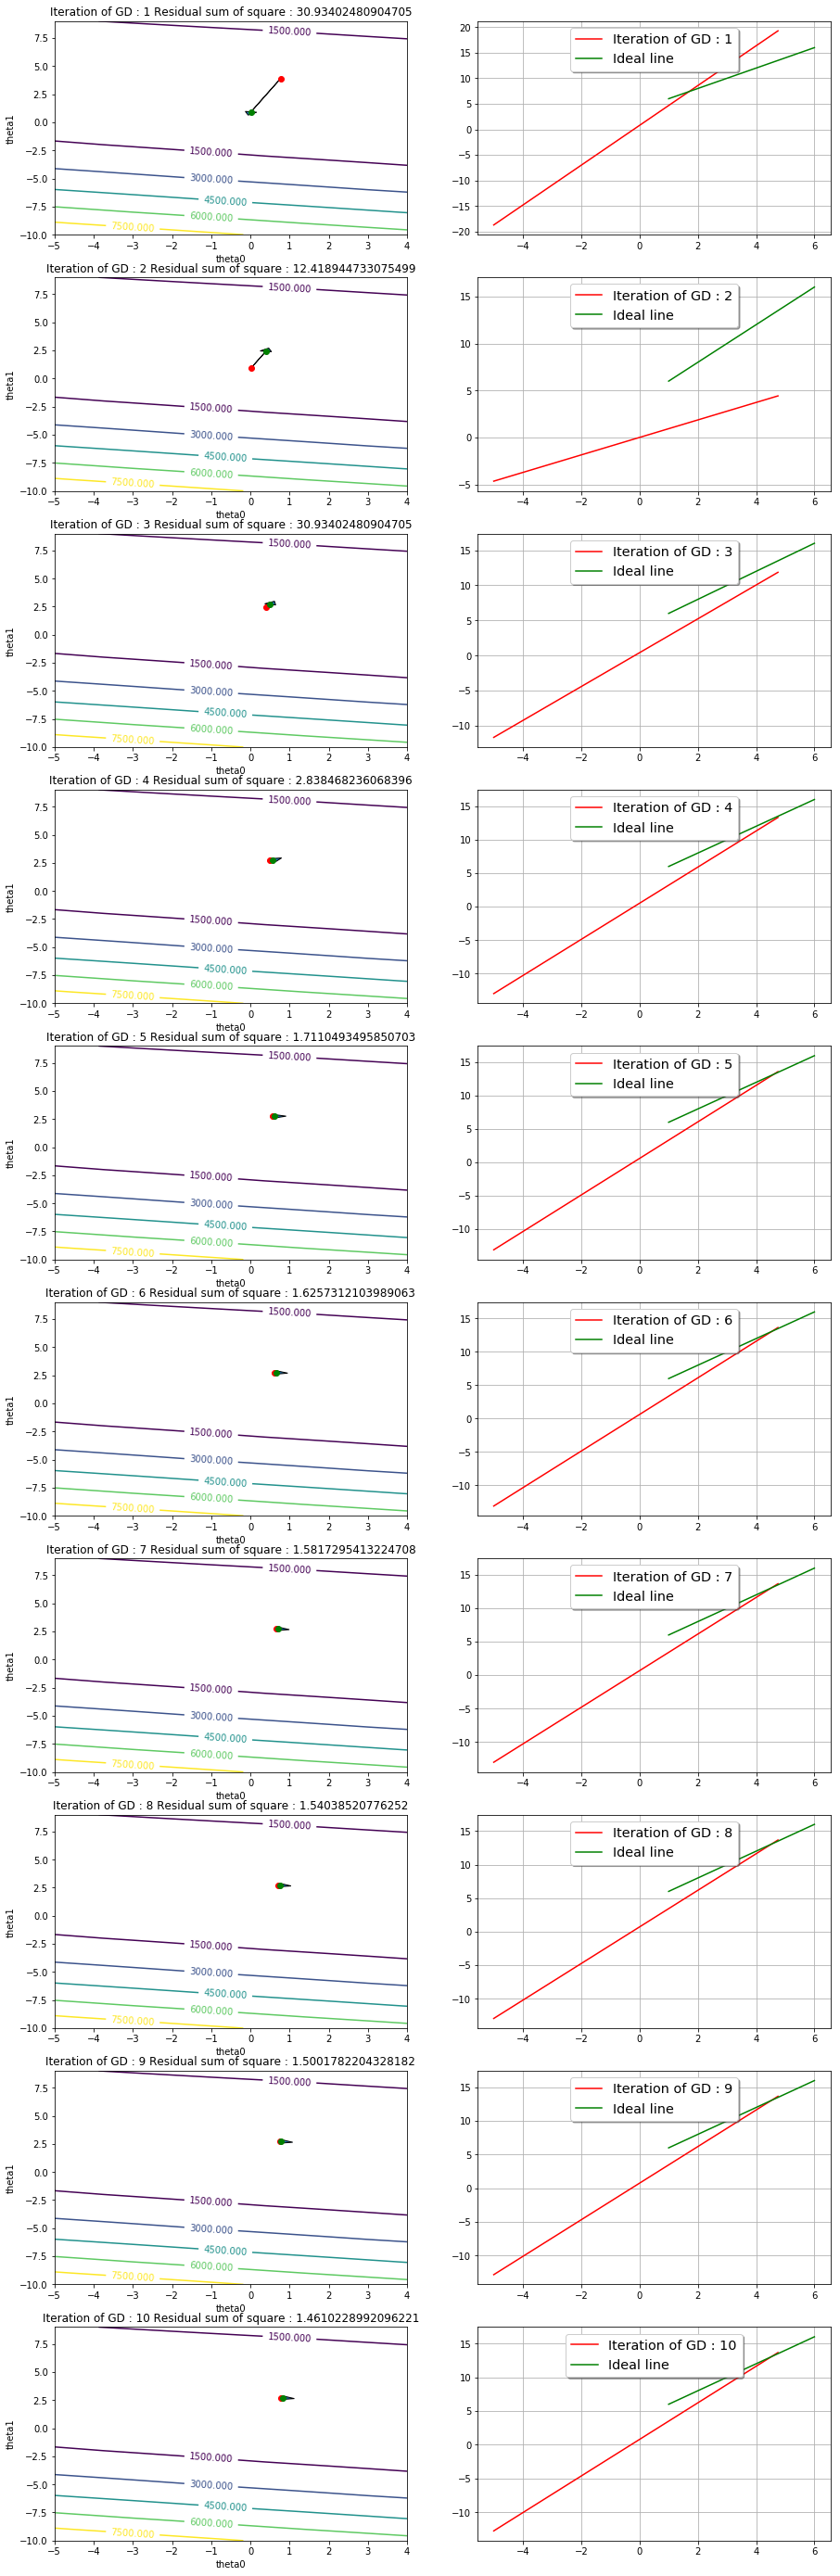

In [272]:
x = np.arange(-5.0, 5.0, 1)
y = np.arange(-10.0, 10.0, 1)
X, Y = np.meshgrid(x, y)
Z = 3*(X**2) + 46 *(Y**2) + 20*X*Y - 64*X - 246*Y + 392
howManyPlot = 10
indx = np.arange(0,len(thetas),len(thetas)/howManyPlot)
indx.tolist()

x_line = np.arange(-5, 5, 0.25)
x_ideal = []
base_no = 2*howManyPlot*10
f = plt.figure(figsize=(15,50))
#print(base_no)

for i in range(len(indx)):
    ax = f.add_subplot(howManyPlot , 2 , 2*i+1)
    #ax = plt.subplot(howManyPlot , 2 , 2*i+1)
    CS = ax.contour(X, Y, Z)
    ax.clabel(CS, inline=1, fontsize=10)
    ax.set_title('Iteration of GD : '+str(i+1)+' Residual sum of square : '+str(cost[i]))
    ax.set_xlabel("theta0")
    ax.set_ylabel("theta1")
    #ax.plot(thetas[int(indx[i])][0],thetas[int(indx[i])][1],'ro')
    #ax.plot(thetas[int(indx[i])+1][0],thetas[int(indx[i])+1][1],'go')
    ax.plot(thetas[i][0],thetas[i][1],'ro')
    ax.plot(thetas[i+1][0],thetas[i+1][1],'go')
    ax.arrow(thetas[i][0],thetas[i][1],thetas[i+1][0] - thetas[i][0],thetas[i+1][1] - thetas[i][1] , width = 0.002, head_width = 0.3,head_length = 0.3)
    
    y_line = thetas[i][0] + thetas[i][1]*x_line
    ax_line = f.add_subplot(howManyPlot , 2 , 2*i+2)
    ln = ax_line.plot(x_line,y_line,'r-',label='Iteration of GD : '+str(i+1))
    ax_line.plot(X_6b,Y_6b,'g-',label='Ideal line')
    legend = ax_line.legend(loc='upper center', shadow=True, fontsize='x-large')
    ax_line.grid()
    
